<a href="https://colab.research.google.com/github/araujorobert/Multivariant-Statistics/blob/main/Tarea_4_(deteci%C3%B3n_de_outliers_en_el_espacio_multivariante_usando_la_distancia_mahalanobis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy 

In [2]:
link = "https://raw.githubusercontent.com/joanby/curso-estadistica-multivariante/master/Seccion%203%20Distribuci%C3%B3n%20multivariante/Datos/companies79.csv"
df = pd.read_csv(link)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8
0,BellAtlantic,19788,9084,10636,1092.9,2576.8,79.4,Communication
1,ContinentalTelecom,5074,2557,1892,239.9,578.3,21.9,Communication
2,AmericanElectricPower,13621,4848,4572,485.0,898.9,23.4,Energy
3,BrooklynUnionGas,1117,1038,478,59.7,91.7,3.8,Energy
4,CentralIllinoisPublicService,1633,701,679,74.3,135.9,2.8,Energy


In [3]:
X = df[['V2','V3','V4','V5','V6','V7']]
Xlog = np.log(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


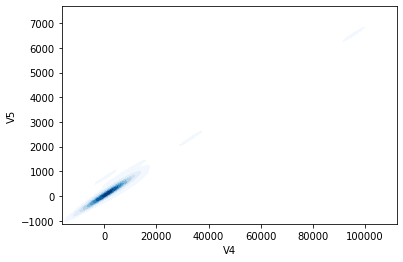

In [4]:
# comparaos las densidades kernel de las variables V4 y V5
sb.kdeplot(X.V4,X.V5, cmap='Blues', shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


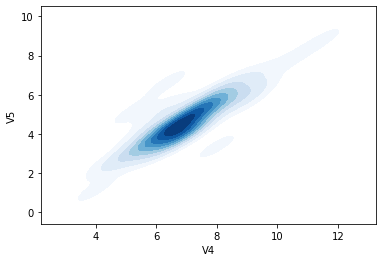

In [5]:
# comparaos las densidades kernel de las variables V4 y V5
sb.kdeplot(Xlog.V4,Xlog.V5, cmap='Blues', shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


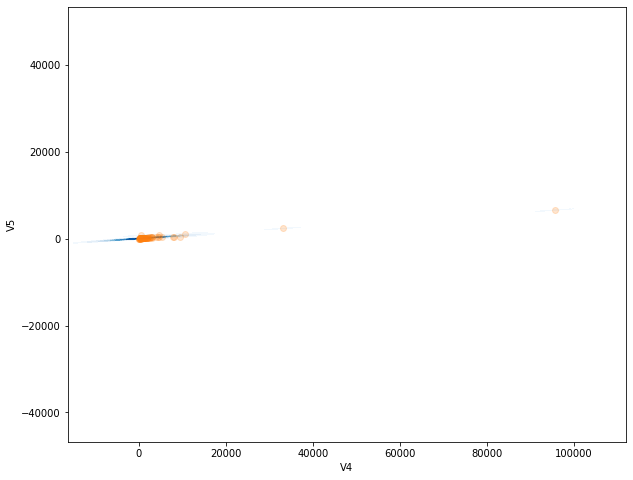

In [6]:
plt.figure(figsize=(10,8))
sb.kdeplot(X.V4,X.V5, cmap='Blues', shade=True)
plt.plot(X.V4,X.V5,'o',alpha=0.2)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


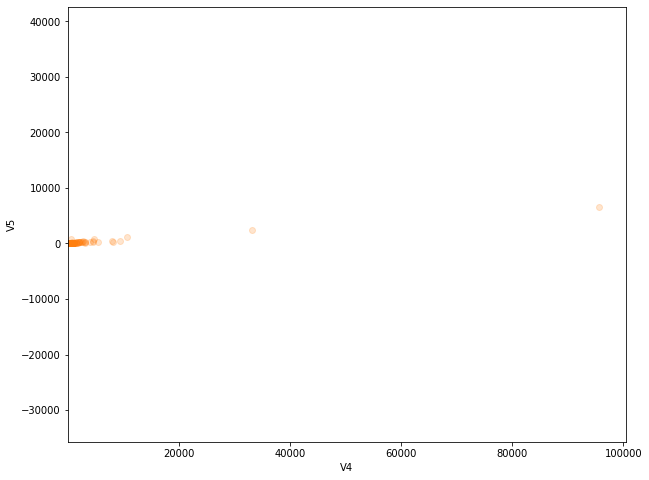

In [7]:
plt.figure(figsize=(10,8))
sb.kdeplot(Xlog.V4,Xlog.V5, cmap='Blues', shade=True)
plt.plot(X.V4,X.V5,'o',alpha=0.2)
plt.axis('equal')
plt.show()

In [8]:
mu = np.mean(X)
Sx = np.cov(X)
Sx_inv = np.linalg.inv(Sx)

In [9]:
#create function to calculate Mahalanobis distance
def mahalanobis(x):
    # La media
    mu = np.mean(x)
    # la diferencia
    x_mu = x-mu
    # La matriz de covarianza
    cov = np.cov(x.values.T)
    cov_inv = np.linalg.inv(cov)
    # la distancia mahalanobis
    left = np.dot(x_mu, cov_inv)
    mahal = np.dot(left, x_mu.T).diagonal()
    dm = np.sqrt(mahal)
    return dm

Sea $X$ una variable aleatoria multivariante, esto es: $X=[\vec{x}_1,\vec{x}_2,..,\vec{x}_n]$ y $\mu$ su vector de medias, la distancia mahalanobis de un vector aleatorio cualquiera $\vec{x}_i$ de $X$ al vector de medias $\mu$ es:
$$
d_m(\vec{x}_i,\vec{\mu}) = \sqrt{ (\vec{x}_i-\vec{\mu})^T \Sigma^{-1}(\vec{x}_i-\vec{\mu})}
$$

In [10]:
mahalanobis(X)

array([6.68350704, 1.4444341 , 1.72705738, 0.8023331 , 0.7565855 ,
       1.55158439, 1.69824428, 0.74577508, 0.81075073, 0.76442009,
       1.54822638, 0.88809552, 0.91618821, 6.78571161, 0.83844564,
       0.9014792 , 1.44291029, 0.76696759, 0.78794083, 0.98920384,
       0.88708796, 6.72643868, 1.06735548, 0.81164157, 0.75733121,
       0.82724184, 0.76078588, 4.90062431, 1.65619363, 1.23864471,
       3.01148013, 1.49872526, 1.28124902, 0.8808584 , 1.2156809 ,
       1.80279876, 0.81379903, 4.42871844, 1.82047388, 8.43255243,
       1.21502283, 0.85653139, 0.61967217, 0.77305369, 0.50568913,
       2.43284496, 6.88760077, 0.62495429, 0.67398611, 0.92412474,
       1.40096744, 3.89101664, 0.96772762, 1.49090902, 0.78478147,
       0.97858719, 0.79454959, 4.45595351, 0.71814897, 0.74233286,
       0.67450287, 1.05797514, 1.12811879, 2.42594636, 0.7511615 ,
       0.83201824, 1.6604349 , 4.67460077, 1.5129496 , 0.8640082 ,
       1.27600452, 1.04071476, 3.03189849, 1.49175374, 1.58324

In [11]:
df['distance']=mahalanobis(X)
df

,V1,V2,V3,V4,V5,V6,V7,V8,distance
0,BellAtlantic,19788,9084,10636,1092.9,2576.8,79.4,Communication,6.683507
1,ContinentalTelecom,5074,2557,1892,239.9,578.3,21.9,Communication,1.444434
2,AmericanElectricPower,13621,4848,4572,485.0,898.9,23.4,Energy,1.727057
3,BrooklynUnionGas,1117,1038,478,59.7,91.7,3.8,Energy,0.802333
4,CentralIllinoisPublicService,1633,701,679,74.3,135.9,2.8,Energy,0.756586
...,...,...,...,...,...,...,...,...,...
74,IUInternational,999,1878,393,173.5,108.1,23.3,Transportation,1.583242
75,PanAm,2448,3484,1036,48.8,257.1,25.4,Transportation,1.175431
76,RepublicAirlines,1286,1734,361,69.2,145.7,14.3,Transportation,0.604438
77,TWA,2769,3725,663,208.4,12.4,29.1,Transportation,2.147460


In [12]:
np.sort(df.distance)

array([0.50568913, 0.60443777, 0.61967217, 0.62495429, 0.67398611,
       0.67450287, 0.67902871, 0.71814897, 0.74233286, 0.74577508,
       0.7511615 , 0.7565855 , 0.75733121, 0.76078588, 0.76442009,
       0.76696759, 0.77305369, 0.78478147, 0.78794083, 0.79454959,
       0.8023331 , 0.81075073, 0.81164157, 0.81379903, 0.82724184,
       0.83201824, 0.83844564, 0.85653139, 0.8640082 , 0.8808584 ,
       0.88708796, 0.88809552, 0.9014792 , 0.91618821, 0.92412474,
       0.96772762, 0.97858719, 0.98920384, 1.04071476, 1.05797514,
       1.06735548, 1.12811879, 1.17543132, 1.21502283, 1.2156809 ,
       1.23864471, 1.27600452, 1.28124902, 1.40096744, 1.44291029,
       1.4444341 , 1.49090902, 1.49175374, 1.49872526, 1.5129496 ,
       1.54822638, 1.55158439, 1.58324239, 1.65619363, 1.6604349 ,
       1.69824428, 1.72705738, 1.80279876, 1.82047388, 2.14745975,
       2.42594636, 2.43284496, 3.01148013, 3.03189849, 3.89101664,
       4.42871844, 4.45595351, 4.67460077, 4.90062431, 6.68350

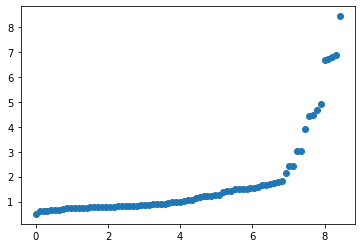

In [13]:
plt.scatter(np.linspace(0,max(df.distance),len(df.distance)),np.sort(df.distance))

In [14]:
from scipy.stats import chi2

#calculate p-value for each mahalanobis distance 
df['quantile'] = chi2.cdf(df['distance'], 6)
quantile_95 = np.sqrt( scipy.stats.chi2.ppf(0.95, 6) )
df['outliers'] = (df['distance'] >= quantile_95).tolist()
df[df['outliers']==True]

,V1,V2,V3,V4,V5,V6,V7,V8,distance,quantile,outliers
0,BellAtlantic,19788,9084,10636,1092.9,2576.8,79.4,Communication,6.683507,0.648890,True
13,PhillipsPetroleum,14045,15636,2754,418.0,1462.0,27.3,Energy,6.785712,0.658880,True
21,Cigna,44736,16197,4653,732.5,651.9,48.5,Finance,6.726439,0.653111,True
27,MellonBank,33406,3222,1413,201.7,246.7,15.8,Finance,4.900624,0.443379,True
37,GeneralElectric,26432,28285,33172,2336.0,3562.0,304.0,HiTech,4.428718,0.381134,True
39,IBM,52634,50056,95697,6555.0,9874.0,400.2,HiTech,8.432552,0.791906,True
46,LTV,6307,8199,598,771.5,524.3,57.5,Manufacturing,6.887601,0.668633,True
51,UnitedTechnologies,10528,14992,5377,312.7,710.7,184.8,Manufacturing,3.891017,0.308578,True
57,AlliedSignal,13271,9115,8190,279.0,83.0,143.8,Other,4.455954,0.384778,True
67,Kroger,4178,17124,2091,180.8,390.4,164.6,Retail,4.674601,0.413828,True


In [15]:
companies_with_utliers = df[df['outliers']==True]
higher_outlier = max(companies_with_utliers['distance'])
higher_outlier

8.43255242640073

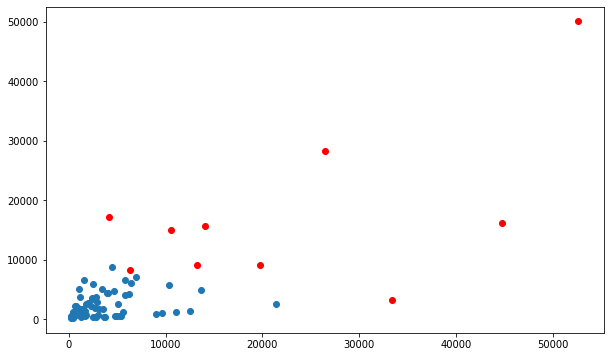

In [16]:
# Observaciones sin outliers
df1 = df[ df['outliers'] == False ]
# Observaciones con outliers
df2 = df[ df['outliers'] == True  ]

# Graficamos
plt.figure(figsize=(10,6))
plt.scatter(df1['V2'],df1['V3'])
plt.scatter(df2['V2'],df2['V3'], c='r', marker='o')
plt.show()

In [17]:
# Observaciones sin outliers
out = df[ df['outliers'] == True ]
# Observaciones con outliers
Xclean = df[ df['outliers'] == False  ]

len(out),len(Xclean)

(10, 69)

In [18]:
mu_clean = np.mean(Xclean.iloc[:,1:7])
print('mu:')
print(mu)
print('mu_clean')
print(mu_clean)

mu:
V2    5940.531646
V3    4178.291139
V4    3269.746835
V5     268.289873
V6     433.455696
V7      37.597468
dtype: float64
mu_clean
V2    3535.898551
V3    2292.391304
V4    1358.391304
V5     120.504348
V6     205.234783
V7      22.381159
dtype: float64


In [19]:
# Recalculamos las distancias para el dataset Xclean
mahalanobis(Xclean.iloc[:,1:7])

array([3.3169903 , 4.54886812, 0.87982539, 0.94402846, 2.96150561,
       3.32494319, 1.37367684, 1.0720738 , 0.87882971, 2.81954831,
       1.29075731, 1.14234989, 1.2418246 , 1.63862289, 2.47628692,
       1.17931202, 1.17842934, 1.34320639, 1.41804643, 1.63564205,
       1.23574068, 1.14584916, 1.3012685 , 1.16605629, 2.82723659,
       2.0066088 , 5.26911416, 2.50969954, 2.11118862, 1.43063934,
       1.62653095, 4.38092728, 1.46636231, 5.74017519, 2.29069362,
       1.13185194, 0.80828128, 1.09724242, 1.15133209, 4.55688903,
       1.32371132, 2.0021975 , 2.93780548, 2.1588577 , 1.51074448,
       2.38992605, 1.05027044, 1.45044602, 1.68344522, 1.67139749,
       0.81910398, 0.97161943, 1.46814043, 2.27825438, 3.96765531,
       0.90320102, 1.08597571, 3.62293608, 2.38829632, 1.83852452,
       2.60471433, 2.16788373, 4.86861354, 3.78852963, 2.83603389,
       2.60499384, 0.98215205, 4.84256265, 0.99443531])

In [20]:
Xclean2 = Xclean.drop(columns=['outliers','quantile'],axis=1)
Xclean2

,V1,V2,V3,V4,V5,V6,V7,V8,distance,quantile
1,ContinentalTelecom,5074,2557,1892,239.9,578.3,21.9,Communication,1.444434,0.036900
2,AmericanElectricPower,13621,4848,4572,485.0,898.9,23.4,Energy,1.727057,0.056987
3,BrooklynUnionGas,1117,1038,478,59.7,91.7,3.8,Energy,0.802333,0.007989
4,CentralIllinoisPublicService,1633,701,679,74.3,135.9,2.8,Energy,0.756586,0.006812
5,ClevelandElectricIlluminating,5651,1254,2002,310.7,407.9,6.2,Energy,1.551584,0.044005
...,...,...,...,...,...,...,...,...,...,...
74,IUInternational,999,1878,393,173.5,108.1,23.3,Transportation,1.583242,0.046225
75,PanAm,2448,3484,1036,48.8,257.1,25.4,Transportation,1.175431,0.021919
76,RepublicAirlines,1286,1734,361,69.2,145.7,14.3,Transportation,0.604438,0.003674
77,TWA,2769,3725,663,208.4,12.4,29.1,Transportation,2.147460,0.094351


In [26]:
#calculate quantile to detect outliers
Xclean2['quantile'] = chi2.cdf(Xclean2['distance'], 6)
Xclean2['outliers'] = (Xclean2['distance'] >= quantile_95)
Xclean2[Xclean2['outliers']==True]

,V1,V2,V3,V4,V5,V6,V7,V8,distance,quantile,outliers
1,ContinentalTelecom,5074,2557,1892,239.9,578.3,21.9,Communication,1.444434,0.036900,False
2,AmericanElectricPower,13621,4848,4572,485.0,898.9,23.4,Energy,1.727057,0.056987,False
3,BrooklynUnionGas,1117,1038,478,59.7,91.7,3.8,Energy,0.802333,0.007989,False
4,CentralIllinoisPublicService,1633,701,679,74.3,135.9,2.8,Energy,0.756586,0.006812,False
5,ClevelandElectricIlluminating,5651,1254,2002,310.7,407.9,6.2,Energy,1.551584,0.044005,False
6,ColumbiaGasSystem,5835,4053,1601,93.8,173.8,10.8,Energy,1.698244,0.054743,False
7,FloridaProgress,3494,1653,1442,160.9,320.3,6.4,Energy,0.745775,0.006551,False
8,IdahoPower,1654,451,779,84.8,130.4,1.6,Energy,0.810751,0.008218,False
9,KansasPower&Light,1679,1354,687,93.8,154.6,4.6,Energy,0.764420,0.007006,False
10,MesaPetroleum,1257,355,181,167.5,304.0,0.6,Energy,1.548226,0.043773,False


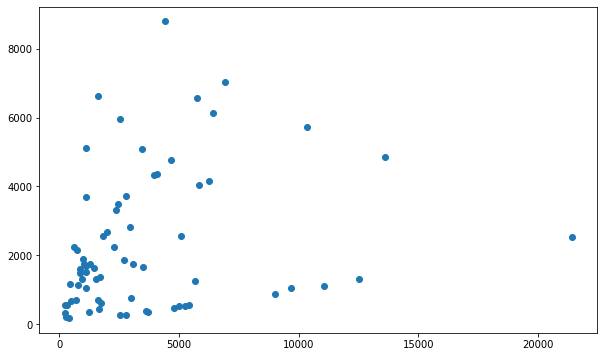

In [30]:
# Observaciones sin outliers
df1 = Xclean2[ Xclean2['outliers'] == False ]
# Observaciones con outliers
df2 = Xclean2[ Xclean2['outliers'] == True  ]

# Graficamos
plt.figure(figsize=(10,6))
plt.scatter(df1['V2'],df1['V3'])
plt.scatter(df2['V2'],df2['V3'], c='r', marker='o')
plt.show()